##PyCaret Multiclass Classification
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Here i'll be perfroming the multiclass Classification code and requirements to run code

#  Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [ ]:
!pip install pycaret[full]

## To start with
PyCaret’s Classification Module is a supervised learning tool for classifying data into groups, predicting categorical labels that are discrete and unordered. It supports both binary and multiclass classification problems, offering data preprocessing through the setup function, over 18 built-in algorithms, and various performance plots.

The typical workflow includes:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [15]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

In [29]:
# Get the 'boston' dataset
boston_data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
# Print some info
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [41]:
from pycaret.datasets import get_data
import pandas as pd

# Load the Boston Housing dataset
boston_data = get_data('boston')

# Bin the 'medv' column into categories
boston_data['price_category'] = pd.cut(boston_data['medv'], bins=[0, 20, 40, 60], labels=['Low', 'Medium', 'High'])

# Check the distribution of the new target variable
print(boston_data['price_category'].value_counts())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


price_category
Medium    260
Low       215
High       31
Name: count, dtype: int64


In [42]:
from pycaret.classification import setup

# Initialize PyCaret setup with the new target variable
s = setup(boston_data, target='price_category', session_id=123)


,Description,Value
0,Session id,123
1,Target,price_category
2,Target type,Multiclass
3,Target mapping,"High: 0, Low: 1, Medium: 2"
4,Original data shape,"(506, 15)"
5,Transformed data shape,"(506, 15)"
6,Transformed train set shape,"(354, 15)"
7,Transformed test set shape,"(152, 15)"
8,Numeric features,14
9,Preprocess,True


Once the setup is successfully executed in PyCaret, an information grid appears summarizing key experiment details:

* Session ID: A pseudo-random seed for reproducibility. If not provided, one is generated and shared across functions.
* Target Type: Automatically detected as Binary, Multiclass, or Regression.
* Label Encoding: Converts string target labels (e.g., 'Yes'/'No') into numeric values (0/1). If the target is already numeric, no encoding is needed.
* Original Data Shape: The dataset's shape before any transformations.
* Transformed Train/Test Shape: The shape of the train and test sets after transformations.
* Numeric Features: The number of features classified as numerical.
Categorical Features: The number of features classified as categorical.

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [43]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
experiment = ClassificationExperiment()

In [44]:
# check the type of exp
type(experiment)

pycaret.classification.oop.ClassificationExperiment

In [45]:
# init setup on exp
experiment.setup(boston_data, target = 'price_category', session_id = 123)

,Description,Value
0,Session id,123
1,Target,price_category
2,Target type,Multiclass
3,Target mapping,"High: 0, Low: 1, Medium: 2"
4,Original data shape,"(506, 15)"
5,Transformed data shape,"(506, 15)"
6,Transformed train set shape,"(354, 15)"
7,Transformed test set shape,"(152, 15)"
8,Numeric features,14
9,Preprocess,True


We can use either the Functional or OOP method, and switch between them as needed. Both methods will yield consistent results, and their outputs have been tested for reliability.

##Compare Models

The compare_models function trains and evaluates all available models in the library using cross-validation. It outputs a scoring grid showing the average performance of each model. You can view the evaluation metrics used during cross-validation with the get_metrics function. Additionally, custom metrics can be added or removed using the add_metric and remove_metric functions.

In [47]:
# compare baseline models
thisone = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0450
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1520
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6090
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.9180
xgboost,Extreme Gradient Boosting,0.9971,1.0000,0.9971,0.9973,0.9967,0.9947,0.9948,0.1000
lightgbm,Light Gradient Boosting Machine,0.9944,1.0000,0.9944,0.9952,0.9941,0.9899,0.9902,0.5400
rf,Random Forest Classifier,0.9887,1.0000,0.9887,0.9909,0.9885,0.9795,0.9802,0.4360
lr,Logistic Regression,0.9575,0.0000,0.9575,0.9591,0.9571,0.9223,0.9237,0.8370
lda,Linear Discriminant Analysis,0.9209,0.0000,0.9209,0.9262,0.9208,0.8571,0.8609,0.1080
et,Extra Trees Classifier,0.9067,0.9838,0.9067,0.9127,0.9060,0.8293,0.8342,0.4170


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [48]:
# compare models using OOP
experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0420
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1540
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7160
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.6780
xgboost,Extreme Gradient Boosting,0.9971,1.0000,0.9971,0.9973,0.9967,0.9947,0.9948,0.0930
lightgbm,Light Gradient Boosting Machine,0.9944,1.0000,0.9944,0.9952,0.9941,0.9899,0.9902,0.4410
rf,Random Forest Classifier,0.9887,1.0000,0.9887,0.9909,0.9885,0.9795,0.9802,0.2260
lr,Logistic Regression,0.9575,0.0000,0.9575,0.9591,0.9571,0.9223,0.9237,0.4110
lda,Linear Discriminant Analysis,0.9209,0.0000,0.9209,0.9262,0.9208,0.8571,0.8609,0.0440
et,Extra Trees Classifier,0.9067,0.9838,0.9067,0.9127,0.9060,0.8293,0.8342,0.1840


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

The output remains consistent between the functional and OOP APIs. For the rest of the notebook, only the functional API will be demonstrated.

## Analyze Model
we can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases, but here we aldredy have the trained model's.

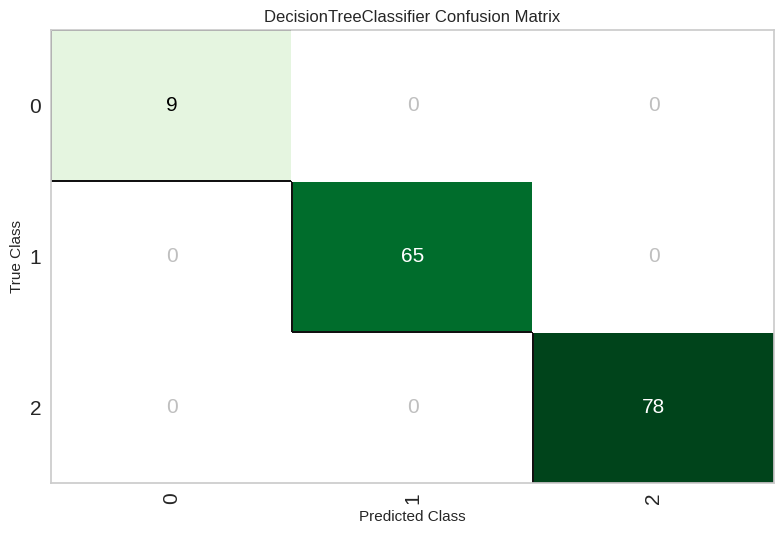

In [49]:
# plot confusion matrix :
#A confusion matrix is a visual representation that shows the performance of a classification model by displaying the counts of true positives, true negatives, false positives, and false negatives.
plot_model(thisone, plot = 'confusion_matrix')

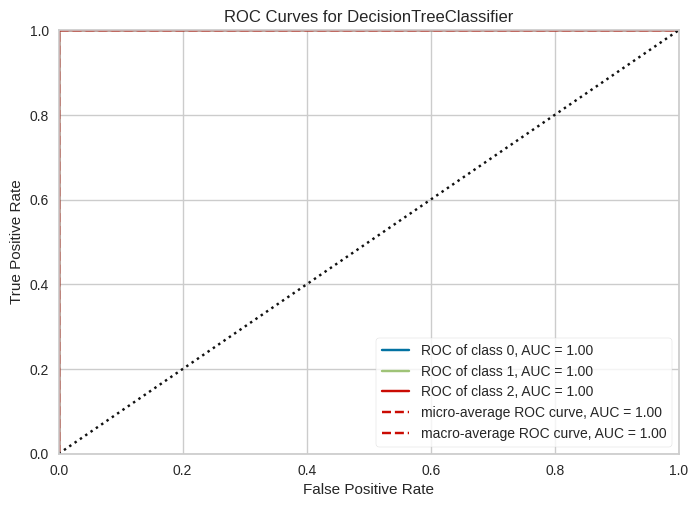

In [50]:
# plot AUC -> (Area Under the Curve) graph
plot_model(thisone, plot = 'auc')

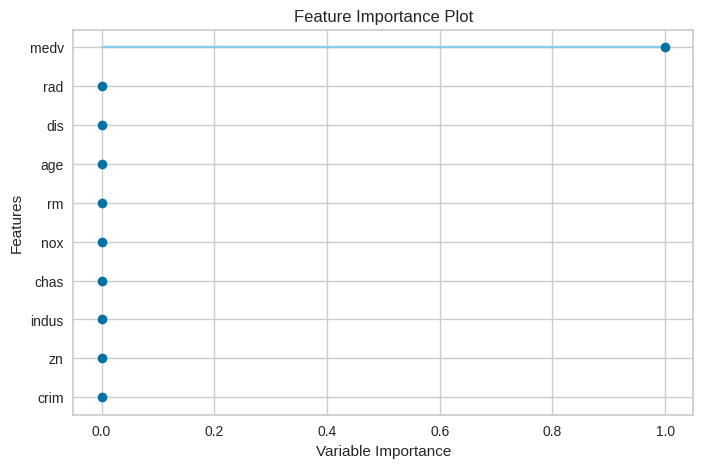

In [51]:
# plot feature importance
plot_model(thisone, plot = 'feature')

In [52]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternative to the plot_model function is evaluate_model, which can only be used in a notebook environment as it relies on ipywidgets.

In [53]:
##The evaluate_model function displays interactive visualizations of various performance metrics for the best-performing model in a notebook environment.
evaluate_model(thisone)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The predict_model function adds prediction_label and prediction_score (the probability of the predicted class) as new columns to the dataframe. If no data is provided (default), it uses the test set created during the setup phase for predictions.

In [54]:
# predict on test set
test_predictions = predict_model(thisone)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [55]:
# show predictions df
test_predictions.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,price_category,prediction_label,prediction_score
100,0.14866,0.0,8.56,0,0.520,6.727,79.900002,2.7778,5,384,20.900000,394.760010,9.420000,27.500000,Medium,Medium,1.0
425,15.86030,0.0,18.10,0,0.679,5.896,95.400002,1.9096,24,666,20.200001,7.680000,24.389999,8.300000,Low,Low,1.0
446,6.28807,0.0,18.10,0,0.740,6.341,96.400002,2.0720,24,666,20.200001,318.010010,17.790001,14.900000,Low,Low,1.0
38,0.17505,0.0,5.96,0,0.499,5.966,30.200001,3.8473,5,279,19.200001,393.429993,10.130000,24.700001,Medium,Medium,1.0
397,7.67202,0.0,18.10,0,0.693,5.747,98.900002,1.6334,24,666,20.200001,393.100006,19.920000,8.500000,Low,Low,1.0


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the default. We can then use the new data frame without labels for scoring.

In [56]:
# copy data and drop Class variable

New_data = boston_data.copy()
New_data.drop('price_category', axis=1, inplace=True)
New_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [57]:
# predict model on new_data
predictions = predict_model(thisone, data = New_data)
predictions.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,prediction_label,prediction_score
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000,Medium,1.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000,Medium,1.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001,Medium,1.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002,Medium,1.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001,Medium,1.0


## Save Model
At last, we can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [58]:
# save pipeline
save_model(thisone, 'second_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['crim', 'zn', 'indus', 'chas',
                                              'nox', 'rm', 'age', 'dis', 'rad',
                                              'tax', 'ptratio', 'black', 'lstat',
                                              'medv'],
                                     transformer=SimpleImputer(add_indicator=Fals...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                

In [59]:
# load pipeline
loaded_best_pipeline = load_model('second_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['crim', 'zn', 'indus', 'chas',
                                             'nox', 'rm', 'age', 'dis', 'rad',
                                             'tax', 'ptratio', 'black', 'lstat',
                                             'medv'],
                                    transformer=SimpleImputer(add_ind...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)